In [3]:
# Необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [4]:
# Считывание данных
df = pd.read_csv('abalone_names.data')
# Просмотр данных
df.head(5)


,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# Для дальнейшей визуальной интерпретации главных компонент отделяем котегориальный признак Gender

# Переводим словесные идентификаторы признака в числовые и записываем в массив y
dct = {'M': 0,'F': 1,'I':2}
y = df['Gender'].map(dct)
# Задаем метки категориального признака Gender для графика
target_names = ['Male', 'Female', 'Infant']

# Записываем остальные признаки в массив X
X = df.drop(['Gender'], axis= 1)

X[0:4]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [6]:
# Осуществляем стандартизацию исходных данных (на основе среднего значения и стандартного отклонения)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_st = scaler.fit(X).transform(X)

X_st[0:4]

array([[-0.57455813, -0.43214879, -1.06442415, -0.64189823, -0.60768536,
        -0.72621157, -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, -1.23027711, -1.17090984,
        -1.20522124, -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, -0.30946926, -0.4634999 ,
        -0.35668983, -0.20713907, -0.28962385],
       [-0.69947638, -0.43214879, -0.34709919, -0.63781934, -0.64823753,
        -0.60759966, -0.60229374,  0.02057072]])

In [7]:
# Применим метод главных компонент PCA к стандартизованным данным

# Инициализируем объект PCA (pca), указываем количество компонент (признаков)
# пусть = 2 (для визуализации результатов метода на графике)
# (вообще максимальное число компонент равно числу признаков)
pca = PCA(n_components = 2)
X_pca = pca.fit(X_st).transform(X_st)

# Выводим объяснённую дисперсию (в процентах) всех сгенерированных компонент,
# чтобы оценить вклад каждой компоненты в общий объём объяснённой дисперсии
print('Объяснённая дисперсия (двух первых компонент): %s'
	% str(pca.explained_variance_ratio_))

Объяснённая дисперсия (двух первых компонент): [0.83905489 0.08695162]


In [8]:
# Посмотрим вклад каждой компоненты в общий объём объяснённой дисперсии

# Explained Variance Ratio (вклад каждой компоненты в общий объём объяснённой дисперсии)
evr = pca.explained_variance_ratio_
# Cumulative Variance Ratio (кумулятивный размер объяснённой дисперсии данных)
cvr = np.cumsum(pca.explained_variance_ratio_)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

pca_df = pd.DataFrame(index = component_names)
pca_df['Кумулятивная дисперсия, %'] = cvr
pca_df['Объяснённая дисперсия, %'] = evr
display(pca_df.head(10))

,"Кумулятивная дисперсия, %","Объяснённая дисперсия, %"
PC1,0.839055,0.839055
PC2,0.926007,0.086952


Наибольшй вклад вносит компонента PC1 (84%).

In [9]:
# Построим график объяснённой дисперсии (в процентах) всех сгенерированных компонент
# и график кумулятивной дисперсии (в процентах)

def plot_variance(pca, width=8, dpi=100):
    # зададим параметры рисунка
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # объясненная дисперсия
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Компоненты", title="Объясненная дисперсия, %", ylim=(0.0, 1.0)
    )
    # кумулятивная дисперсия
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Компоненты", title="Кумулятивная дисперсия", ylim=(0.0, 1.0)
    )
    # создадим рисунок
    fig.set(figwidth=8, dpi=100)
    plt.show()
    return axs

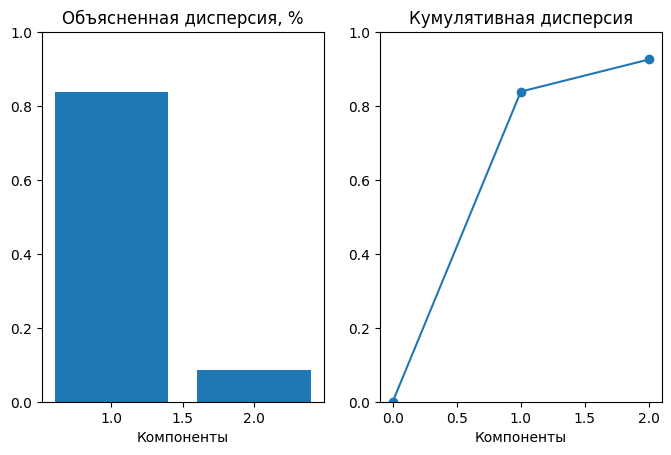

array([<Axes: title={'center': 'Объясненная дисперсия, %'}, xlabel='Компоненты'>,
       <Axes: title={'center': 'Кумулятивная дисперсия'}, xlabel='Компоненты'>],
      dtype=object)

In [10]:
# Построим график объяснённой дисперсии (в процентах) всех сгенерированных компонент
# и график кумулятивной дисперсии (в процентах)
plot_variance(pca, width=8, dpi=100)

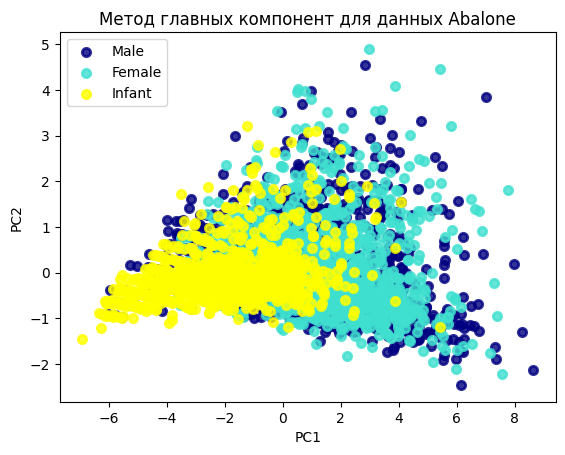

<Figure size 640x480 with 0 Axes>

In [11]:
# Визуализируем результаты применения метода и интерпретируем результаты

# Отобразим на графике результат применения метода главных компонент
# (при числе компонент = 2), где каждый класс признака Gender имеет свой цвет

plt.figure()
colors = ['navy', 'turquoise', 'yellow']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color,
                alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Метод главных компонент для данных Abalone')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.figure()
plt.show()

Возможная интерпретация: точки с меткой Infant в целом имеют меньшие значения компонент PC1 и PC2, чем точки с меткой Male  и Female.

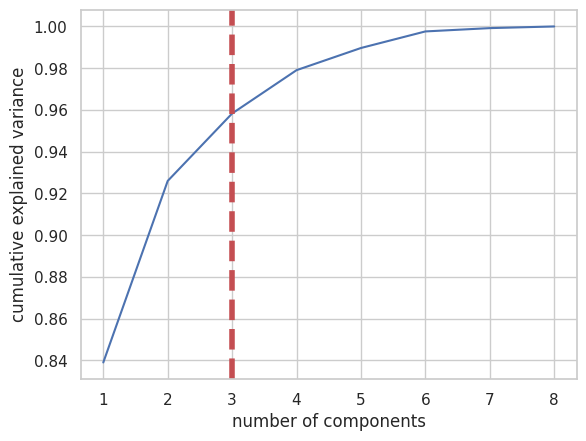

None

In [12]:
# Определим оптимальное число главных компонент K
# K - оптимальное, если при прибавлении следующей объясненной дисперсии K+1 кумулятивная дисперсия меняется незначительно

# Построим график зависимости кумулятивной объяснённой дисперсии от числа компонент,
# где число компонент изменяется от 1 до k, k - число исходных признаков

k = X.shape[1]

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components = k)
pca.fit(X_st).transform(X_st)

sns.set(style='whitegrid')
n = pca.n_components_
grid = np.arange(1, n + 1)
plt.plot(grid, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components') # - число компонент
plt.ylabel('cumulative explained variance') # - кумулятивная (суммарная) объяснённая дисперсия

# вертикальная линия красного цвета, соответствующая оптимальному числу главных компонент K, если K = 3
plt.axvline(linewidth=4, color='r', linestyle = '--', x=3, ymin=0, ymax=1)
display(plt.show())


По графику оптимальное число главных компонент K=6.

7-ая компонента незначительно увеличивает кумулятивную дисперсию.

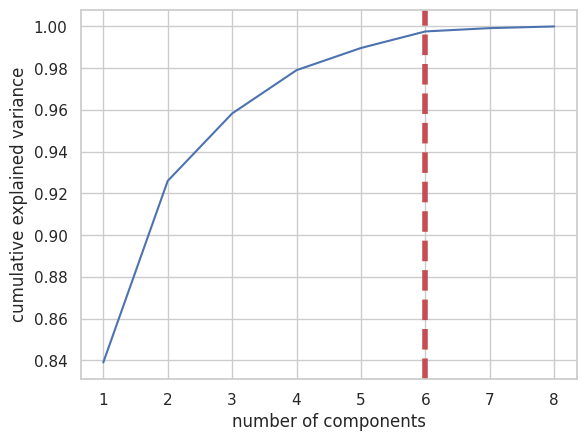

None

In [13]:
# Покажем на графике оптимальное число компонент

sns.set(style='whitegrid')
n = pca.n_components_
grid = np.arange(1, n + 1)
plt.plot(grid, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components') # - число компонент
plt.ylabel('cumulative explained variance') # - кумулятивная (суммарная) объяснённая дисперсия

# вертикальная линия красного цвета, соответствующая оптимальному числу главных компонент K=6
plt.axvline(linewidth=4, color='r', linestyle = '--', x=6, ymin=0, ymax=1)
display(plt.show())

In [14]:
# Каждая компонента представляет собой линейную комбинацию исходных признаков с соответствующими «весами».
# Выведем «веса» для каждой компоненты, создав датафрейм

pca = PCA(n_components = 6)
X_opt = pca.fit(X_st).transform(X_st)

component_names = [f"PC{i+1}" for i in range(X_opt.shape[1])]
columns_names = list(X)
pca_w_df = pd.DataFrame(pca.components_,
                        index = component_names,
                        columns = columns_names)
pca_w_df.head(10).T


,PC1,PC2,PC3,PC4,PC5,PC6
Length,0.372139,-0.068283,0.031070,-0.604054,-0.011125,-0.047497
Diameter,0.373094,-0.040048,0.041005,-0.587595,0.057911,-0.023375
Height,0.340027,0.070463,0.899706,0.256777,-0.056729,0.026691
Whole_weight,0.378307,-0.137346,-0.206194,0.241849,0.015656,0.117255
Shucked_weight,0.362454,-0.298840,-0.208286,0.183246,-0.398525,0.624893
Viscera_weight,0.368558,-0.172979,-0.197380,0.265221,-0.309821,-0.765844
Shell_weight,0.370758,0.045400,-0.161574,0.244192,0.830564,0.032832
Rings,0.242713,0.921204,-0.192144,0.043310,-0.220026,0.068196


Знакоопределенность и значение величины весовых коэффициентов в уравнении компонент говорят, какие изменения компонента фиксирует.

Например:
*   в первой компоненте исходные признаки равнозначны;
*   в четвертой компоненте показывается противопоставление рамерных (длина, ширина) и весовых (вес тельца, вес раковины) характеристик объектов.